## BEEM011 Exercise 2: Week 4

Histograms, p-values, functions

Amy Binner and Eva Poen

Answers

### Setting the seed

When we write code we would like it to be replicable, that means that when we draw a random sample we want others to be able to reproduce the same sample.  To achieve this we need to set the seed for R's random number generator using the set.seed() function.

The function takes an integer as an input.

# Question 1 a)

Suppose you are the lottery fairy in a weekly lottery, where 6 out of 49 unique numbers are drawn. 
In this exercise you will write code in R Studio to generate the winning lottery numbers.

Set the seed to 1234, this will ensure that your code is replicable - each time you run the code you will draw the same winning numbers.


In [2]:
## Edit the code below 
# Header: Exercise 2 
# Author: 
# Date:
# Candidate number:

set.seed(1234)

Next you need to draw the winning numbers for this week using the function sample(data, size).

Data refers to the data from which the sample should be drawn.  You can define data as being the numbers 1 to 10 by writing data <- 1:10

Size is the size of the sample you require.

*Note: if you want to know more about, say, the function sample(), type into your code cell “?sample()” and a detailed manual will appear*


In [ ]:
# Edit the sample function below to draw 6 numbers between 1 and 49.
winners <- sample(1:49, size = 6)

# 1 b)

Let X~N(0,1). Compute P(|X|≤1.64) by using the function pnorm().

the pnorm(x) function tells you the total probability under the probability density function up to the point x

![title](week2norm.png)

In [2]:
# example:
# pnorm(1.96) = P(X≤1.96) = 0.975

pnorm(1.96) - pnorm(-1.96)

[1] 0.9500042

In [6]:
## Compute P(|X|≤1.64)

prob1b <- pnorm(1.64) - pnorm(-1.64)

## DO NOT EDIT
print(paste('P(|X|≤1.64) =', prob1b))

[1] "P(|X|=1.64) = 0.898994833051793"


# 1 c)

Let Y~N(5,25). Compute the 99% quantile of the given distribution. 
That is, find y such that $\phi((y-5)/5)=.99$ using the function qnorm().

*Quantile* 

qnorm(p, mean=z, sd=y) – is the quantile function which returns the value on the x-axis relating to the pth quantile of a normal distribution with mean z and standard deviation y.

In [7]:
# example: calculate the value of the 10% quantile from the normal distribution with mean 0 and variance 1 
qnorm(0.1, mean = 0, sd = sqrt(1))

[1] -1.281552

In [9]:
## Compute the 99% quantile of Y ~N(5,25)

quantile99 <- qnorm(0.99, mean=5, sd = 5)

## DO NOT EDIT
print(paste('The value of the 99% quantile of Y~N(5,25)=', quantile99))

[1] "The value of the 99% quantile of Y~N(5,25)= 16.6317393702042"


Generate 10 random numbers from the distribution in 1 c). To do this you will should set the seed to 1234 and then use the rnorm(size, mean, standard deviation) function.

rnorm stands for random normal.

Round off to three decimal placesusing the round() function. List down all the elements of this sample.  

In [21]:
## Generating 10 random numbers 
set.seed(1234)
numbers <- rnorm(n=10, mean=5, sd = 5)
numbers <- round(numbers, 3)

# DO NOT EDIT
print('The sample is: ')
numbers

[1] "The sample is: "


[1] -1.035  6.387 10.422 -6.728  7.146  7.530  2.126  2.267  2.178  0.550

# Question 2 a)

Consider the following estimator for the population mean of $Y$, $μ_Y$: 

$$ \tilde{Y} = {1 \over n-1} \Sigma_{i=1}^n Y_i $$

In this exercise we will illustrate that this estimator is a biased estimator for $μ_Y$.

Define a function Y_tilde in R-Studio that implements the estimator above. 


In [1]:
## Defining the function by entering the correct
# equation within the curly brackets

# the length() function tells you how many elements are in a vector

Y_tilde <- function(x){
    e = sum(x)/(length(x)-1)
    return(e)
}

# Let's define some observed data as a vector of observations
Y = c(1,5,8,10,-256)

# Print these observations
Y

# Calculate n the number of observations
length(Y)

# Now let's use the function Y_tilde() on our observations
Y_tilde(Y)

[1]    1    5    8   10 -256

[1] 5

[1] -58

# 2 b)

To repeat computations you can use the replicate() function:

replicate(n , expr)
#n is the number of replications
#expr is the expression to be evaluated

In [2]:
# Example: To replicate the function Y 100 times with X 
# being drawn from a normal distribution with mean 100 and 
# standard deviation 20:*

# Function Y takes the input and adds 2
Y <- function(x){x+2}

# A single execution of Y, using a random number from N(100, 20^2) distribution:
one = Y(rnorm(1, mean=100, sd=20))

# print to screen
one

# Do the same x100, all in one step:

plusTwo <- replicate(n = 100, expr = Y(rnorm(1, mean=100, sd=20)))

[1] 101.0661

Set the seed to 1234.  Randomly draw 5 observations from the N(10,25) distribution and compute an estimate using the function Y_tilde you defined in 2 a). Repeat the procedure 10000 times and store the results in est_biased. 

In [3]:
set.seed(1234)
est_biased <- replicate(n=10000, expr = Y_tilde(rnorm(5,mean=10,sd=5)))

# 2 c)	

Use the hist() function to plot a histogram of est_biased and calculate the mean of est_biased using the mean() function.

The hist() function takes a vector of observed values for a variable, calculates their relative frequencies and plots this as a histogram.

[1] 12.5134

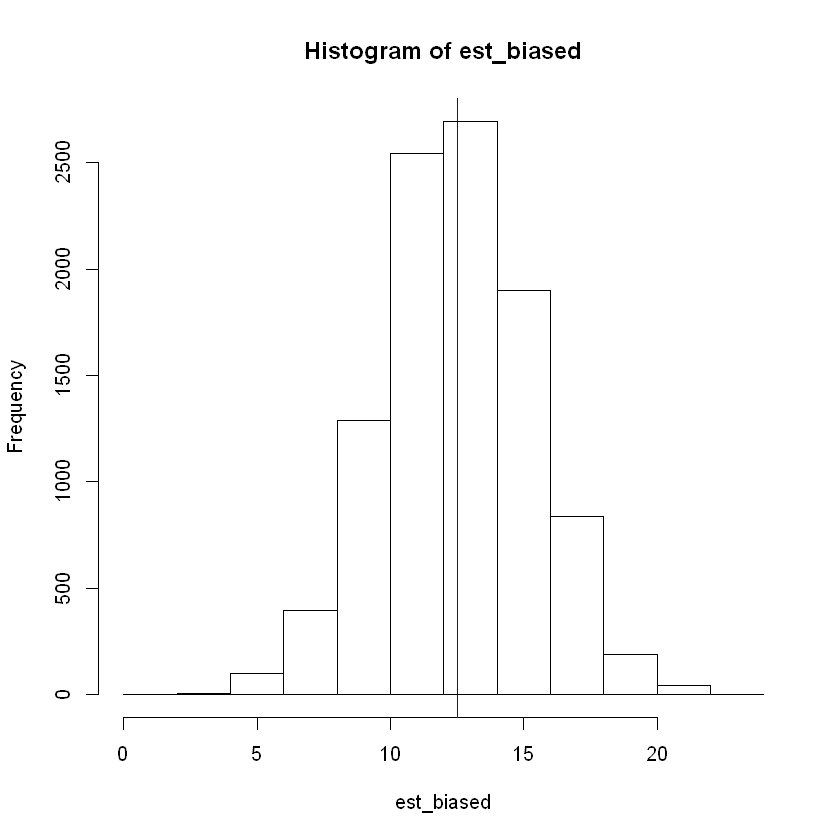

In [4]:
# Plot the histogram - to do this you use the hist(data) function, where data is a vector of observations
hist(est_biased)
mean_est_biased <- mean(est_biased)

# Print the mean - remember that the underlying distribution has mean = 10
mean_est_biased

abline(v=mean_est_biased, col ='blue')

# 2 d)	

Randomly draw 1000 observations from N(10,25) distribution and compute an estimate using the function Y_tilde you defined in 2 a). 

Repeat the procedure 10000 times and store the results in est_consistent.

In [5]:
# Drawing a larger sample of observations
# we do this by increasing the number of samples in the rnorm function
est_consistent <- replicate(n=10000, expr = Y_tilde(rnorm(10000,10,5)))

# 2 e)

Plot a histogram of est_consistent and calculate the mean of est_consistent. 

What can you draw from this exercise. 

[1] 9.999905

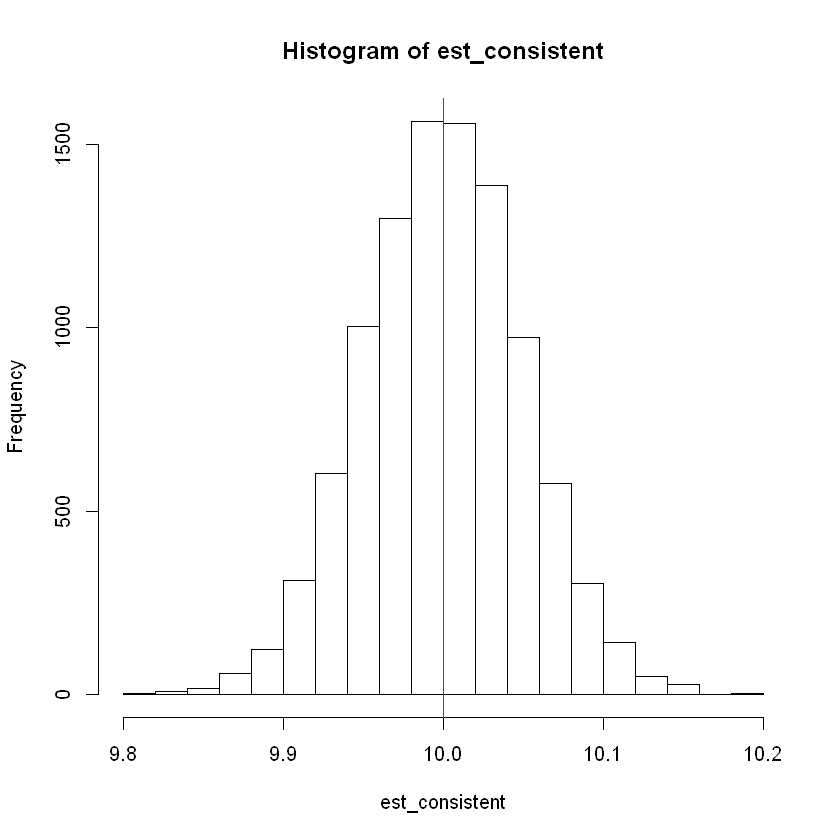

In [6]:
# Plotting the histogram of est_consistent
hist(est_consistent)
mean_est_consistent <- mean(est_consistent)

# Print the mean - remember that the underlying distribution has mean = 10
mean_est_consistent

# Add the mean 
abline(v=mean_est_consistent, col = 'red')

### Useful Code

In [ ]:
set.seed()  #to ensure that your code is replicable.  When we draw a random sample we want others to be able to reproduce the same sample.

sample(data, size = n) # draws a sample of size n from a vector or dataset of data, the default is without replacement

pnorm(x) # calculates the area under the normal curve to the left of x on the x-axis, the default is for a standard normal distribution

qnorm(p) # calculates the value on the x-axis such that p of the standard normal distribution lies under the curve to the left of x

function(x){ } # defines a function within the {} that takes x as an input (refer to Intro to Jupyter seminar or use R help)

replicate(n, expr = y) # repeat the expression y n times and store the output

hist(data) # plot a histogram of a vector of data

abline(v = x) # add a vertical straight line to a plot at point x on the x axis